# Visualize Data

In [1]:
import pandas as pd 
import warnings
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error , mean_absolute_error
import xgboost as xgb
print (xgb.__version__)
import numpy as np
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import lightgbm as lgb
warnings.filterwarnings('ignore')



2.1.2


In [2]:
df=pd.read_csv("./data/train.csv")
df_test=pd.read_csv("./data/test.csv")
df.shape,df_test.shape

((177024, 508), (3644, 507))

In [3]:
df.head(10)

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7
5,p01_5,p01,07:25:00,NaN,NaN,8.1,NaN,NaN,8.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.4
6,p01_6,p01,07:40:00,NaN,NaN,8.3,NaN,NaN,9.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.9
7,p01_7,p01,07:55:00,NaN,NaN,9.6,NaN,NaN,11.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.1
8,p01_8,p01,08:10:00,NaN,NaN,11.1,NaN,NaN,11.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.1
9,p01_9,p01,08:25:00,NaN,NaN,11.8,NaN,NaN,12.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.9


In [4]:
df.describe()


,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00
count,149770.000000,158533.000000,163364.000000,149766.000000,158254.000000,163770.000000,149763.000000,157973.000000,164174.000000,149771.000000,...,141694.000000,141706.000000,141713.000000,141722.000000,141732.000000,141741.000000,141751.000000,141761.000000,141767.000000,177024.000000
mean,8.211018,8.230449,8.253291,8.210988,8.229649,8.254083,8.211049,8.228888,8.254602,8.211000,...,9.364063,9.364096,9.362525,9.366591,9.368108,9.366998,9.370010,9.372536,9.368960,8.277045
std,2.852188,2.913438,2.945594,2.852090,2.911313,2.947651,2.852212,2.909304,2.949689,2.852315,...,8.012264,8.012681,8.017508,8.018465,8.018349,8.023788,8.021999,8.023280,8.023327,2.996398
min,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,...,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,2.200000
25%,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,...,5.600000,5.600000,5.600000,5.600000,5.600000,5.600000,5.600000,5.600000,5.600000,6.100000
50%,7.600000,7.600000,7.700000,7.600000,7.600000,7.700000,7.600000,7.600000,7.700000,7.600000,...,6.180000,6.180000,6.170000,6.180000,6.180000,6.180000,6.180000,6.180000,6.180000,7.700000
75%,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,...,9.060000,9.060000,9.050000,9.060000,9.060000,9.060000,9.060000,9.070000,9.060000,9.900000
max,22.200000,25.100000,27.800000,22.200000,25.100000,27.800000,22.200000,25.100000,27.800000,22.200000,...,116.100000,116.100000,116.100000,116.100000,116.100000,116.100000,116.100000,116.100000,116.100000,27.800000


In [5]:
df.isnull().sum()

id                    0
p_num                 0
time                  0
bg-5:55           27254
bg-5:50           18491
                  ...  
activity-0:15    174293
activity-0:10    174287
activity-0:05    174271
activity-0:00    174287
bg+1:00               0
Length: 508, dtype: int64

In [6]:
insulin=df.filter(regex="insulin")
insulin_test=df_test.filter(regex="insulin")


In [7]:
carbs=df.filter(regex="carbs")
carbs_test=df_test.filter(regex="carbs")

In [8]:
carbs=df.filter(regex="carbs")
carbs=carbs.fillna(0)

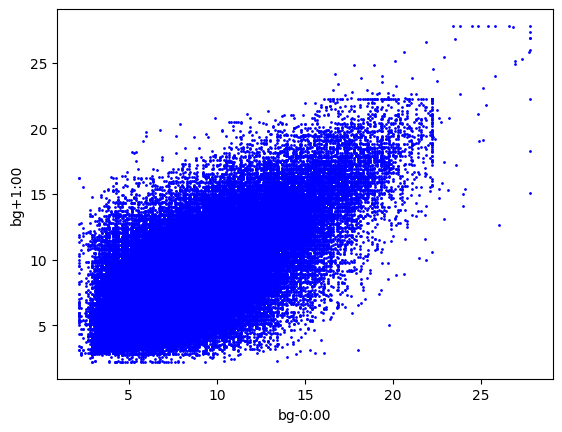

In [9]:
x=df["bg-0:00"]
y=df["bg+1:00"]

plt.scatter(x, y, color='blue', marker='o',s=1)

plt.xlabel('bg-0:00')
plt.ylabel('bg+1:00')

plt.show()

# Feature Engineering

### Keep only the hour instead of the time

In [ ]:

df["time"]=[int(df["time"][i][:2])+int(df["time"][i][3:5])/60 for i in range(len(df["time"]))]
df_test["time"]=[int(df_test["time"][i][:2])+int(df_test["time"][i][3:5])/60 for i in range(len(df_test["time"]))]




0          6
1          6
2          6
3          6
4          7
          ..
177019    23
177020    23
177021    23
177022    23
177023    23
Name: time2, Length: 177024, dtype: int64
[np.float64(8.277378275434813), np.float64(8.277378275434813), np.float64(8.277378275434813), np.float64(8.277378275434813), np.float64(8.277378275434813), np.float64(8.277378275434813), np.float64(8.277378275434813), np.float64(8.277378275434813), np.float64(8.277378275434813), np.float64(8.277378275434813), np.float64(8.277378275434813), np.float64(8.277378275434813), np.float64(8.277378275434813), np.float64(8.277378275434813), np.float64(8.277378275434813), np.float64(8.277378275434813), np.float64(8.277378275434813), np.float64(8.277378275434813), np.float64(8.277378275434813), np.float64(8.277378275434813), np.float64(8.277378275434813), np.float64(8.277378275434813), np.float64(8.277378275434813), np.float64(8.277378275434813)]


### Cumulated insulin at 00:00

In [37]:
mu = 1.5
target_x = 3
target_value = 0.01
sigma = np.sqrt(-(target_x - mu)**2 / (2 * np.log(target_value)))
def gaussian(x):
    return  np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
value={}
for col_name in insulin.columns:
    if col_name != "cumulated_insulin":
        x=int(col_name[8:9])+int(col_name[10:12])/60
        value[col_name]=gaussian(x)

cumulated_insulin=[0 for i in range(177024)]
cumulated_insulin_test=[0 for i in range(3644)]
for col_name in insulin.columns:
    if col_name != "cumulated_insulin":
        cumulated_insulin+=np.multiply(insulin[col_name],value[col_name])
        cumulated_insulin_test+=np.multiply(insulin_test[col_name],value[col_name])   

#df=df.drop(columns=df.filter(regex="insulin"))
df["cumulated_insulin"]=cumulated_insulin
df_test["cumulated_insulin"]=cumulated_insulin_test

### Cumulated carbs

In [14]:
mu = 3
target_x = 1
target_value = 0.01
sigma = np.sqrt(-(target_x - mu)**2 / (2 * np.log(target_value)))
def gaussian(x):
    return  np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

cumulated_carbs=[0 for i in range(177024)]
cumulated_carbs_test=[0 for i in range(3644)]
value={}
for col_name in carbs.columns:
    if col_name != "cumulated_carbs":
        x=int(col_name[6:7])+int(col_name[8:10])/60
        value[col_name]=gaussian(x)

for col_name in carbs.columns:
    if col_name != "cumulated_carbs":
        cumulated_carbs+=np.multiply(carbs[col_name],value[col_name])
        cumulated_carbs_test+=np.multiply(carbs_test[col_name],value[col_name])   

#df=df.drop(columns=df.filter(regex="carbs"))
df["cumulated_carbs"]=cumulated_carbs
df_test["cumulated_carbs"]=cumulated_carbs_test
print(df["cumulated_carbs"])

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
            ...    
177019    40.469148
177020    44.152444
177021    47.958740
177022    51.780828
177023    55.486370
Name: cumulated_carbs, Length: 177024, dtype: float64


### Filling missing datas

In [15]:

bg_col=[col for col in df.columns if col.startswith('bg-')]
df[bg_col]=df[bg_col].interpolate(method='linear',axis=1)
df[bg_col]=df[bg_col].fillna(method='bfill',axis=1)
df_test[bg_col]=df_test[bg_col].fillna(method='ffill',axis=1)
df_test[bg_col]=df_test[bg_col].fillna(method='bfill',axis=1)

hr_col=[col  for col in df.columns if col.startswith('hr-')]
df[hr_col]=df[hr_col].fillna(method='ffill',axis=1)
df[hr_col]=df[hr_col].fillna(method='bfill',axis=1)
df_test[hr_col]=df_test[hr_col].interpolate(method='linear',axis=1)
df_test[hr_col]=df_test[hr_col].fillna(method='bfill',axis=1)

inc_col=[col  for col in df.columns if col.startswith('insulin-')]
df[inc_col]=df[inc_col].interpolate(method='linear',axis=1)
df[inc_col]=df[inc_col].fillna(method='bfill',axis=1)
df_test[inc_col]=df_test[inc_col].fillna(method='ffill',axis=1)
df_test[inc_col]=df_test[inc_col].fillna(method='bfill',axis=1)


print(df)


               id p_num       time  bg-5:55  bg-5:50  bg-5:45    bg-5:40  \
0           p01_0   p01   6.166667      9.6      9.6      9.6   9.633333   
1           p01_1   p01   6.416667      9.7      9.7      9.7   9.533333   
2           p01_2   p01   6.666667      9.2      9.2      9.2   9.033333   
3           p01_3   p01   6.916667      8.7      8.7      8.7   8.600000   
4           p01_4   p01   7.166667      8.4      8.4      8.4   8.300000   
...           ...   ...        ...      ...      ...      ...        ...   
177019  p12_25294   p12  23.583333      8.8      9.1      9.2   9.400000   
177020  p12_25295   p12  23.666667      9.1      9.2      9.4   9.800000   
177021  p12_25296   p12  23.750000      9.2      9.4      9.8  10.200000   
177022  p12_25297   p12  23.833333      9.4      9.8     10.2  10.400000   
177023  p12_25298   p12  23.916667      9.8     10.2     10.4  10.300000   

          bg-5:35  bg-5:30    bg-5:25  ...  activity-0:30  activity-0:25  \
0        9.

### Activities processing

In [16]:
data = {'activity': ['Indoor climbing','Run','Strength training','Swim','Bike','Dancing','Stairclimber','Spinning','Walking','HIIT','Outdoor Bike','Walk','Aerobic Workout','Tennis','Workout','Hike','Zumba','Sport','Yoga','Swimming','Weights','Running','CoreTraining','Cycling']}
data = pd.DataFrame(data)
unique_act={act:i+1 for i,act in enumerate(data['activity'].dropna().unique())}

df[[act for act in df.filter(regex="activity")]]=df.filter(regex="activity").fillna(-1)
df_test[[act for act in df.filter(regex="activity")]]=df_test.filter(regex="activity").fillna(-1)

for value,key in enumerate(unique_act):
    df=df.replace(key,value)
    df_test=df_test.replace(key,value)


### BG variance

In [17]:
bg=df.filter(regex='bg')
bg=bg.iloc[:,-10:-2]
variance_bg = bg.var(axis=1)
print(variance_bg)
df["bg_variance"]=variance_bg

0         0.557917
1         0.683810
2         0.378333
3         0.145952
4         0.047440
            ...   
177019    0.522857
177020    0.461250
177021    0.504107
177022    0.580000
177023    0.715536
Length: 177024, dtype: float64


        bg+1:00
0          13.4
1          12.8
2          15.5
3          14.8
4          12.7
...         ...
177019     11.1
177020     10.9
177021     10.7
177022     10.5
177023     10.2

[177024 rows x 1 columns]


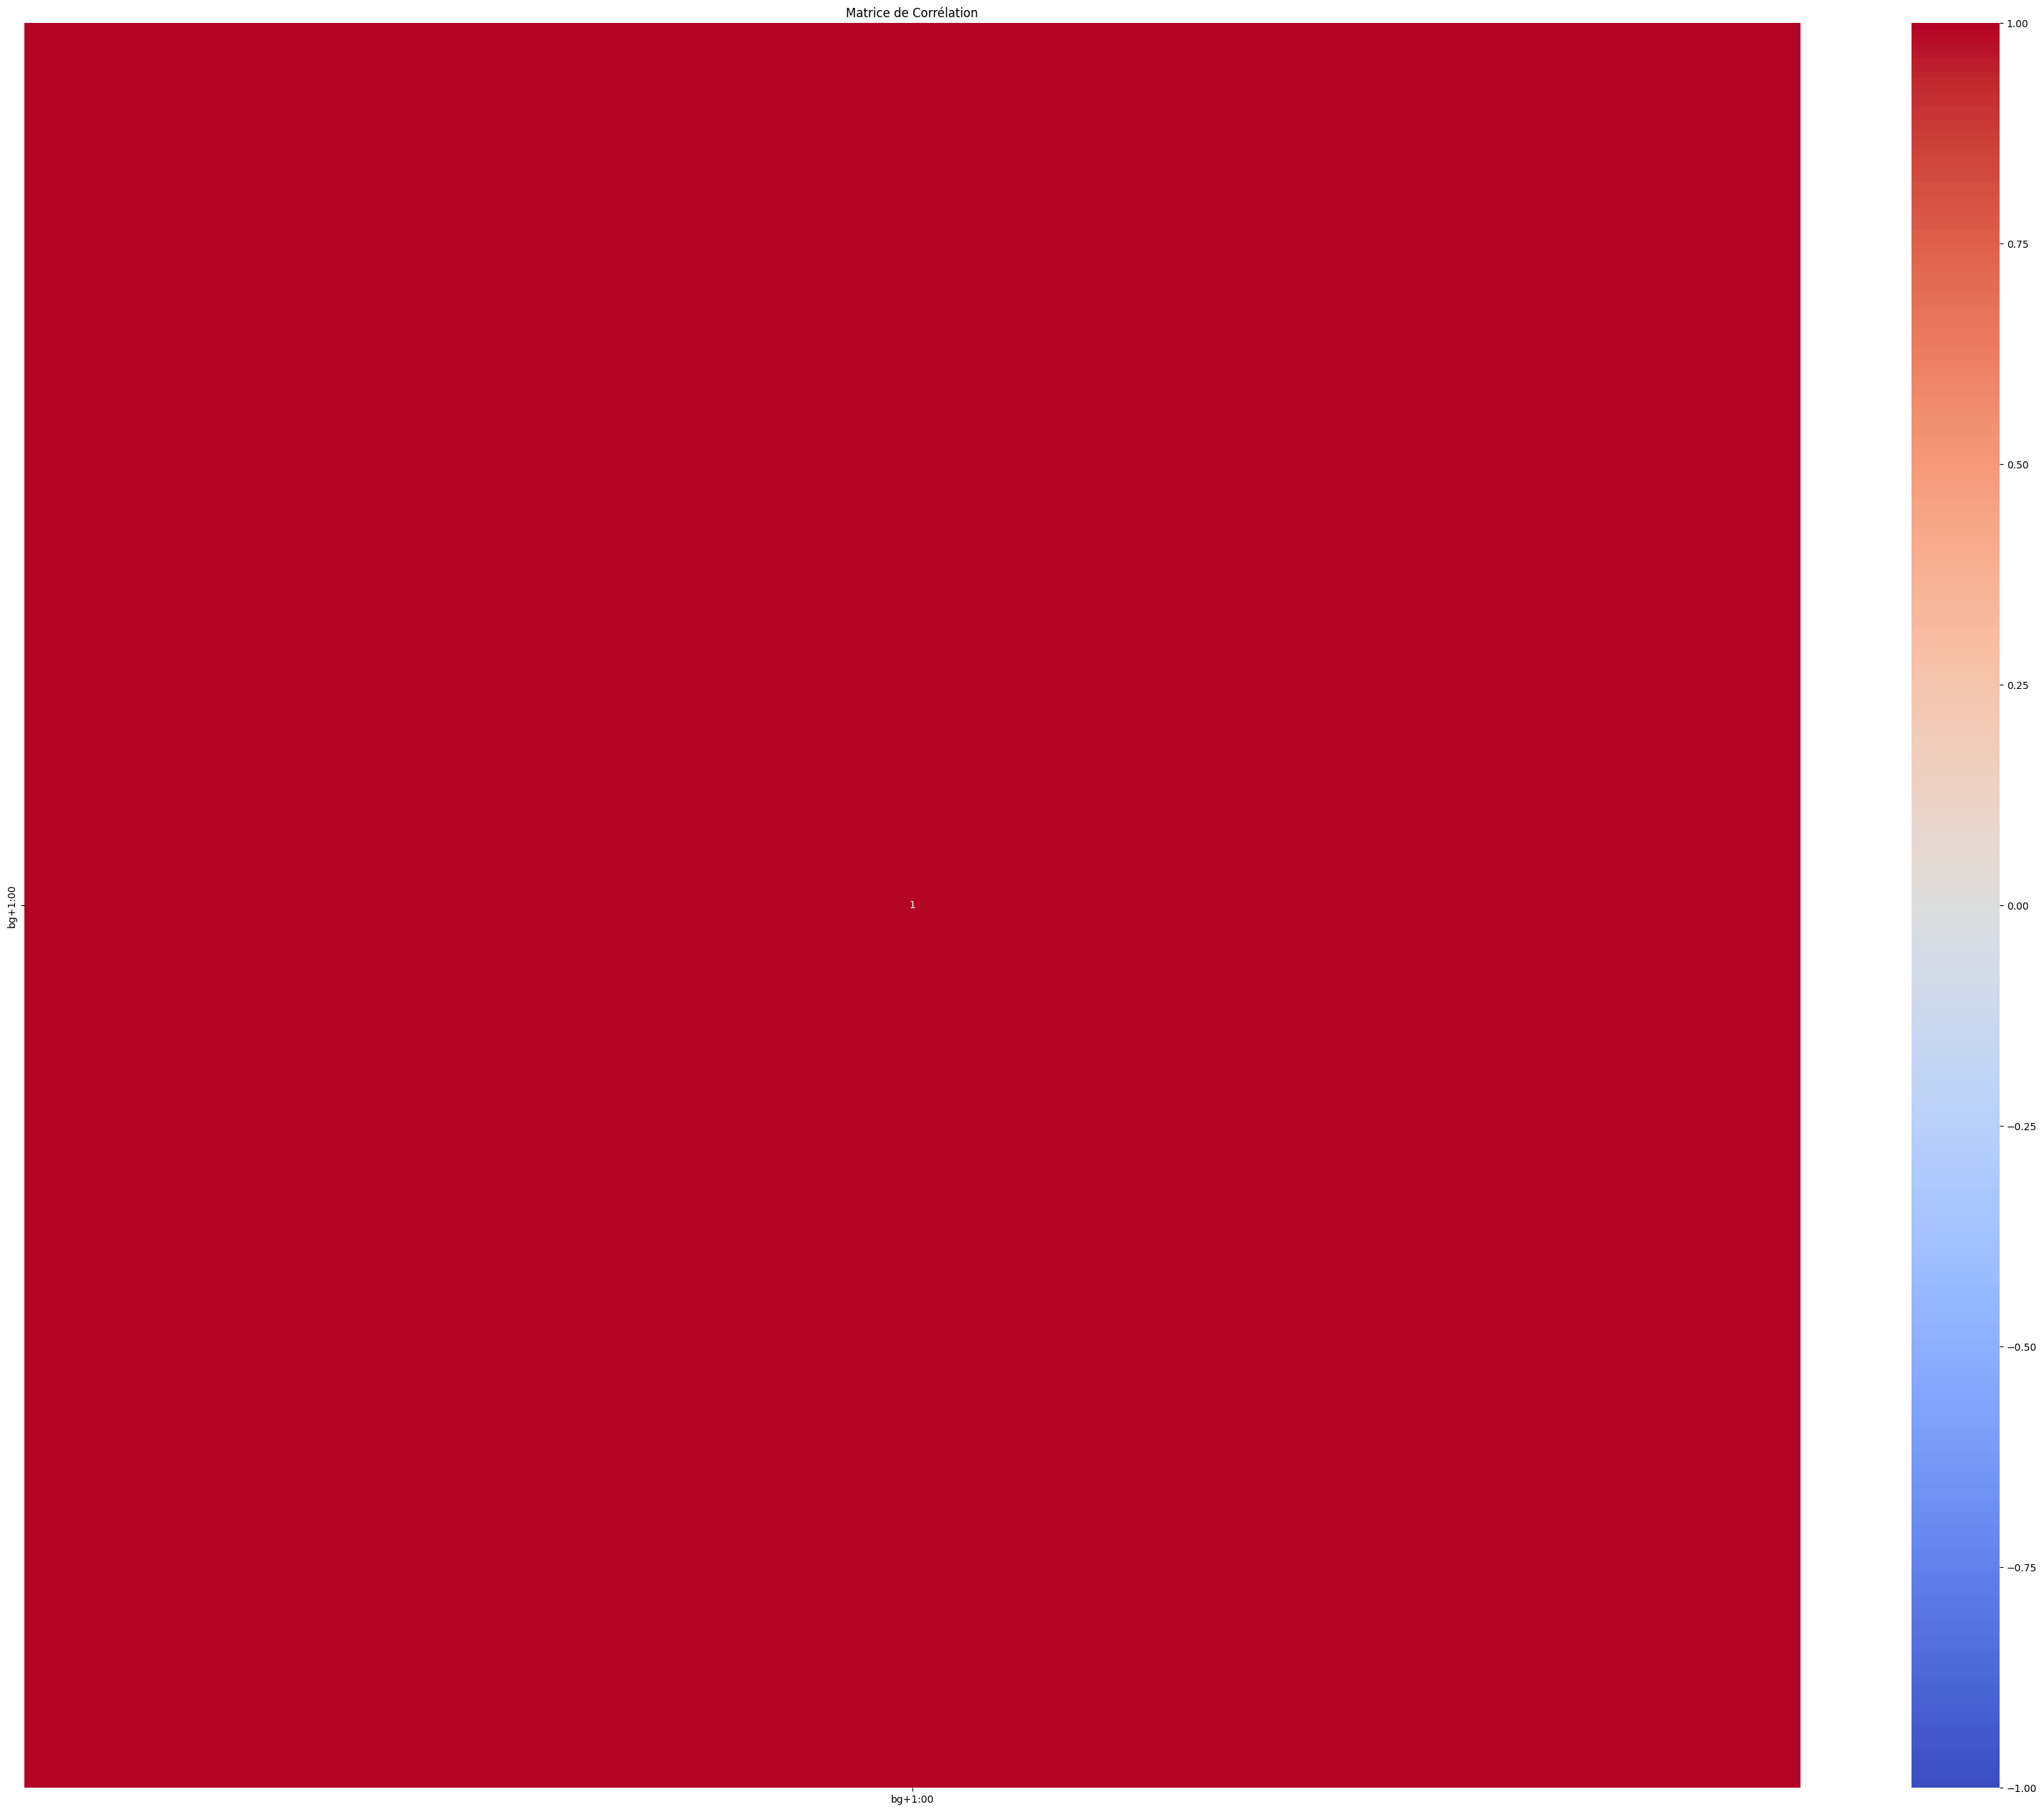

In [10]:
p=pd.DataFrame()
p=df
p=p.drop(columns=["id","p_num","time"])
p=p.filter(regex="variance")
p["bg+1:00"]=df["bg+1:00"]
print(p)
correlation=p.corr()

plt.figure(figsize=(40, 32))  # Taille de la figure
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matrice de Corrélation")
plt.show()

ValueError: x and y must be the same size

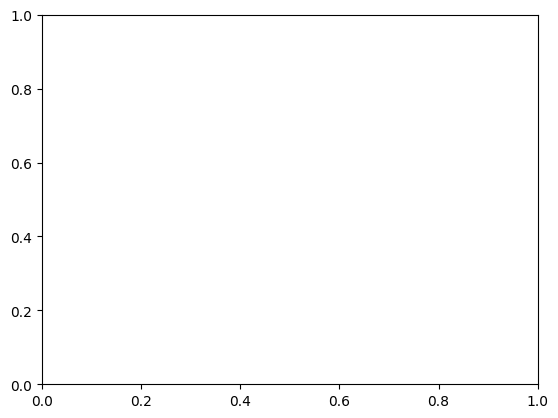

In [77]:
x=bg_hour
y=df["bg+1:00"]
plt.scatter(x, y, color='blue', marker='o',s=1)

plt.xlabel('variance')
plt.ylabel('bg+1')

plt.show()

# XGBoost

### Data Prep

In [17]:
df=df.fillna(-1)
df_test=df_test.fillna(-1)

target=df[["p_num","bg+1:00"]]

LoN=df[df["p_num"]=="p11"]
LoN_target=target[target["p_num"]=="p11"]
LoN_target=LoN_target.drop(columns=["p_num"])
LoN=LoN.drop(columns=["id","p_num","bg+1:00",])
#LoN=LoN.drop(columns=df.filter(regex="activity"))
LoN = LoN.sample(frac=1, random_state=42).reset_index(drop=True)

target=target[target["p_num"]!="p11"]
target=target.drop(columns=["p_num"])
df=df[df["p_num"]!="p11"]
data=df.drop(columns=["id","p_num","bg+1:00",])
#data=data.drop(columns=df.filter(regex="activity"))

x_train,x_val,y_train,y_val=train_test_split(data,target,test_size=0.1,random_state=42)
print(x_train)
x_val,y_val = pd.concat([x_val, LoN], ignore_index=True),pd.concat([y_val, LoN_target], ignore_index=True)
x_val,y_val=x_val.sample(frac=1, random_state=42).reset_index(drop=True),y_val.sample(frac=1, random_state=42).reset_index(drop=True)

             time  bg-5:55  bg-5:50  bg-5:45  bg-5:40  bg-5:35  bg-5:30  \
85673    9.583333     10.4     10.4     10.4     10.4     10.4     10.4   
25014   11.666667      9.6      9.6      9.5      9.4      9.3      9.4   
112656  20.333333      5.3      5.3      5.1      4.7      4.4      4.6   
73650   23.666667      9.8     10.0      9.8      9.5      9.8      9.8   
151782  15.416667      4.5      4.5      4.5      4.5      4.5      4.5   
...           ...      ...      ...      ...      ...      ...      ...   
119879   3.000000     10.1     10.0      9.7      9.7      9.7     10.3   
103694   6.666667      6.7      6.3      6.3      6.9      6.9      6.9   
156487   4.250000      7.8      7.9      8.2      8.5      8.7      9.2   
171422  13.250000      6.1      6.2      6.2      6.3      6.4      6.4   
121958  10.916667      5.7      5.8      5.8      5.8      5.9      6.0   

        bg-5:25  bg-5:20  bg-5:15  ...  activity-0:35  activity-0:30  \
85673      10.5     10.6   

### Search best model parameters

In [18]:
xgb_model2 = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=1000,  
    learning_rate=0.1,
    max_depth=8,    
    subsample=0.8,
    colsample_bytree=0.8,
    #eval_metric=root_mean_squared_error,
    early_stopping_rounds=20,
    min_child_weight=100
    )


xgb_model2.fit(
    x_train, y_train,
    eval_set=[(x_val, y_val)],
    verbose=True
)


y_pred = xgb_model2.predict(x_train)

rmse=root_mean_squared_error(y_train, y_pred)

print("rmse:",rmse)

[0]	validation_0-rmse:2.81110
[1]	validation_0-rmse:2.67574
[2]	validation_0-rmse:2.55903
[3]	validation_0-rmse:2.46080
[4]	validation_0-rmse:2.37581
[5]	validation_0-rmse:2.30243
[6]	validation_0-rmse:2.24117
[7]	validation_0-rmse:2.18834
[8]	validation_0-rmse:2.14404
[9]	validation_0-rmse:2.10751
[10]	validation_0-rmse:2.07443
[11]	validation_0-rmse:2.04589
[12]	validation_0-rmse:2.02118
[13]	validation_0-rmse:1.99823
[14]	validation_0-rmse:1.98047
[15]	validation_0-rmse:1.96367
[16]	validation_0-rmse:1.94777
[17]	validation_0-rmse:1.93495
[18]	validation_0-rmse:1.92523
[19]	validation_0-rmse:1.91306
[20]	validation_0-rmse:1.90408
[21]	validation_0-rmse:1.89698
[22]	validation_0-rmse:1.88872
[23]	validation_0-rmse:1.88253
[24]	validation_0-rmse:1.87644
[25]	validation_0-rmse:1.87118
[26]	validation_0-rmse:1.86770
[27]	validation_0-rmse:1.86372
[28]	validation_0-rmse:1.85782
[29]	validation_0-rmse:1.85511
[30]	validation_0-rmse:1.85271
[31]	validation_0-rmse:1.84943
[32]	validation_0-

In [1225]:
models = {
    'adaboost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(tree_method='hist', device='cuda', objective='reg:squarederror', n_estimators=100),
    'RandomForest': RandomForestRegressor(n_estimators=20, random_state=42, n_jobs=-1),

}

rmse_dict = {}
predictions = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    rmse_dict[name] = rmse
    predictions.append(y_pred)
    print(f"{name} RMSE: {rmse:.4f}")

y_pred_ensemble = np.mean(predictions, axis=0)
rmse_ensemble = root_mean_squared_error(y_val, y_pred_ensemble)
print(f"Ensemble RMSE: {rmse_ensemble:.4f}")

KeyboardInterrupt: 

In [1220]:
y_pred_val=xgb_model2.predict(x_val)
rmse=root_mean_squared_error(y_val, y_pred_val)
print("rmse:",rmse)

NotFittedError: need to call fit or load_model beforehand

# Submission CSV

In [1221]:
data_test=df_test.drop(columns=["id","p_num"])
print(data_test)
#data_test=data_test.drop(columns=df.filter(regex="activity"))

#y_pred_test=xgb_model2.predict(data_test)


           time  bg-5:55  bg-5:50  bg-5:45  bg-5:40  bg-5:35  bg-5:30  \
0      6.750000      9.2      9.2      9.2      9.2     10.2     10.2   
1     11.416667      9.9      9.9      9.9      9.9      9.9      9.4   
2     14.750000      5.5      5.5      5.5      5.5      5.5      5.5   
3      4.500000      3.4      3.4      3.4      3.4      3.9      3.9   
4      4.333333      8.3      8.3      8.3      8.3      8.3     10.0   
...         ...      ...      ...      ...      ...      ...      ...   
3639   6.666667      7.3      7.3      7.1      6.7      6.8      6.8   
3640  12.500000      6.0      6.2      6.2      6.2      5.8      5.5   
3641   3.750000     12.4     12.5     12.7     13.1     13.2     13.3   
3642   6.166667      8.3      8.3      8.2      8.2      7.8      7.4   
3643   3.166667      9.9     10.1     10.0      9.9     10.0      9.7   

      bg-5:25  bg-5:20  bg-5:15  ...  activity-0:35  activity-0:30  \
0        10.2     10.3     10.3  ...             -1  

In [1223]:
y_pred_submission_xgb = models['XGBoost'].predict(data_test)
y_pred_submission_rf = models['RandomForest'].predict(data_test)
y_pred_submission_ab = models['adaboost'].predict(data_test)
y_pred_submission = (y_pred_submission_xgb + y_pred_submission_rf + y_pred_submission_ab) / 3

In [1224]:
#results={"id":df_test["id"],"bg+1:00":y_pred_test}
results={"id":df_test["id"],"bg+1:00":y_pred_submission_xgb}
submission=pd.DataFrame(results)
print(submission.shape)
submission.to_csv('submission.csv', index=False, encoding='utf-8')

(3644, 2)
